In [2]:
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import argparse
# parser = argparse.ArgumentParser(description='Plot the data')
# args = parser.parse_args()

In [4]:
with xr.open_dataset("/opt/aqmsp_models/models/config_dec22/mean/cpcb_ijcai24/config1/fold_0/predictions.nc") as ds:
    pass
ds

<xarray.Dataset>
Dimensions:        (time: 744, station: 17)
Coordinates:
  * time           (time) datetime64[ns] 2022-12-01T00:30:00 ... 2022-12-31T2...
  * station        (station) object 'Ashok_Vihar_Delhi_DPCC' ... 'Vasundhara_...
    lat            (station) float64 ...
    lon            (station) float64 ...
    elevation      (station) float64 ...
    pop_1km        (station) float64 ...
    pop_2km        (station) float64 ...
    pop_3km        (station) float64 ...
Data variables: (12/26)
    PM2.5          (time, station) float64 ...
    PM10           (time, station) float64 ...
    NO             (time, station) float64 ...
    NO2            (time, station) float64 ...
    NOx            (time, station) float64 ...
    NH3            (time, station) float64 ...
    ...             ...
    TOT-RF         (time, station) float64 ...
    SR             (time, station) float64 ...
    BP             (time, station) float64 ...
    VWS            (time, station) float64 ...
    PM2.5_missing  (time, station) bool ...
    pred           (time, station) float64 ...

In [139]:
ds = xr.open_dataset("/home/patel_zeel/aqmsp/aqmsp_data/datasets/cpcb/2022.nc")

In [140]:
ds["PM2.5"].mean(dim="time").to_dataframe().sort_values(by="PM2.5", ascending=False)

,latitude,longitude,PM2.5
station,,,
"Jahangirpuri, Delhi - DPCC",28.732820,77.170633,127.079544
"Anand Vihar, Delhi - DPCC",28.647622,77.315809,124.772503
"Burari Crossing, Delhi - IMD",28.725650,77.201157,121.370641
"Nehru Nagar, Delhi - DPCC",28.567890,77.250515,116.786342
"NSIT Dwarka, Delhi - CPCB",28.609090,77.032541,116.438935
"Punjabi Bagh, Delhi - DPCC",28.674045,77.131023,114.697056
"Bawana, Delhi - DPCC",28.776200,77.051074,114.693462
"Wazirpur, Delhi - DPCC",28.699793,77.165453,114.659894
"Mundka, Delhi - DPCC",28.684678,77.076574,114.626821


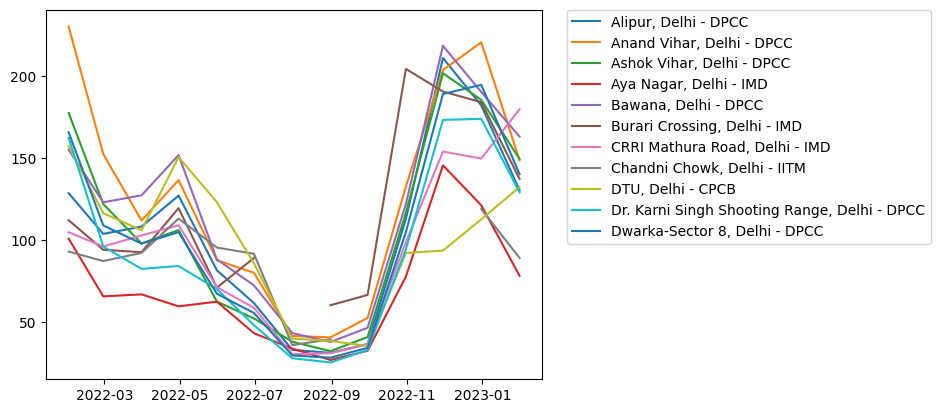

In [141]:
i = 0
month_ds = ds.resample(time="1M").mean()
# plot timeseries of all stations
for station in ds.station:
    station_ds = month_ds.sel(station=station)
    plt.plot(station_ds.time, station_ds["PM2.5"], label=station.values)
    i += 1
    if i > 10:
        break
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

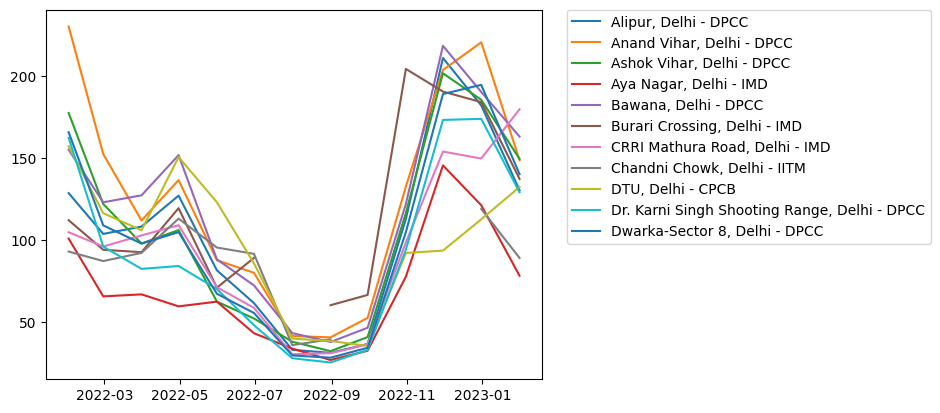

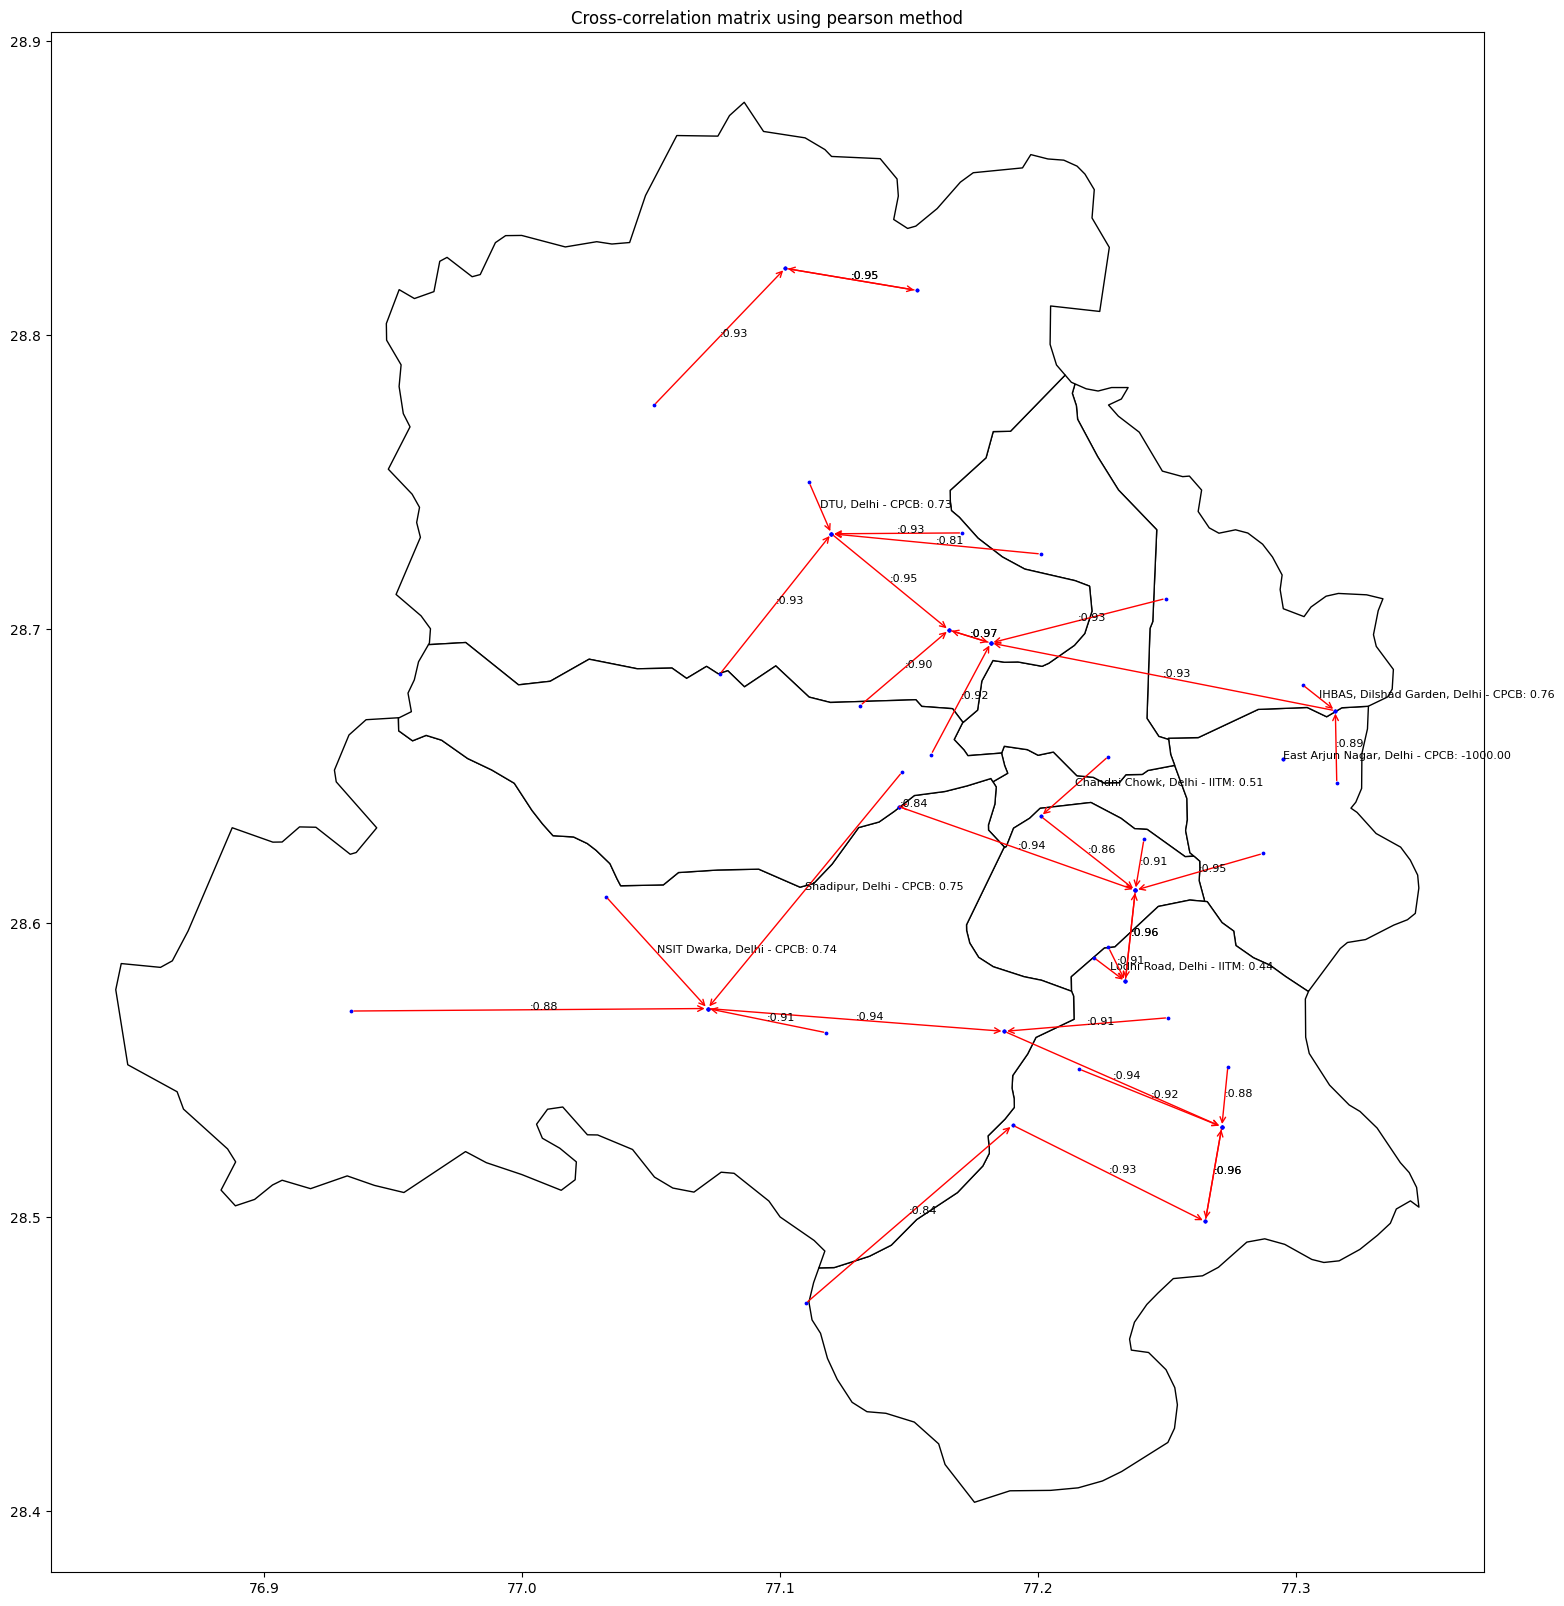

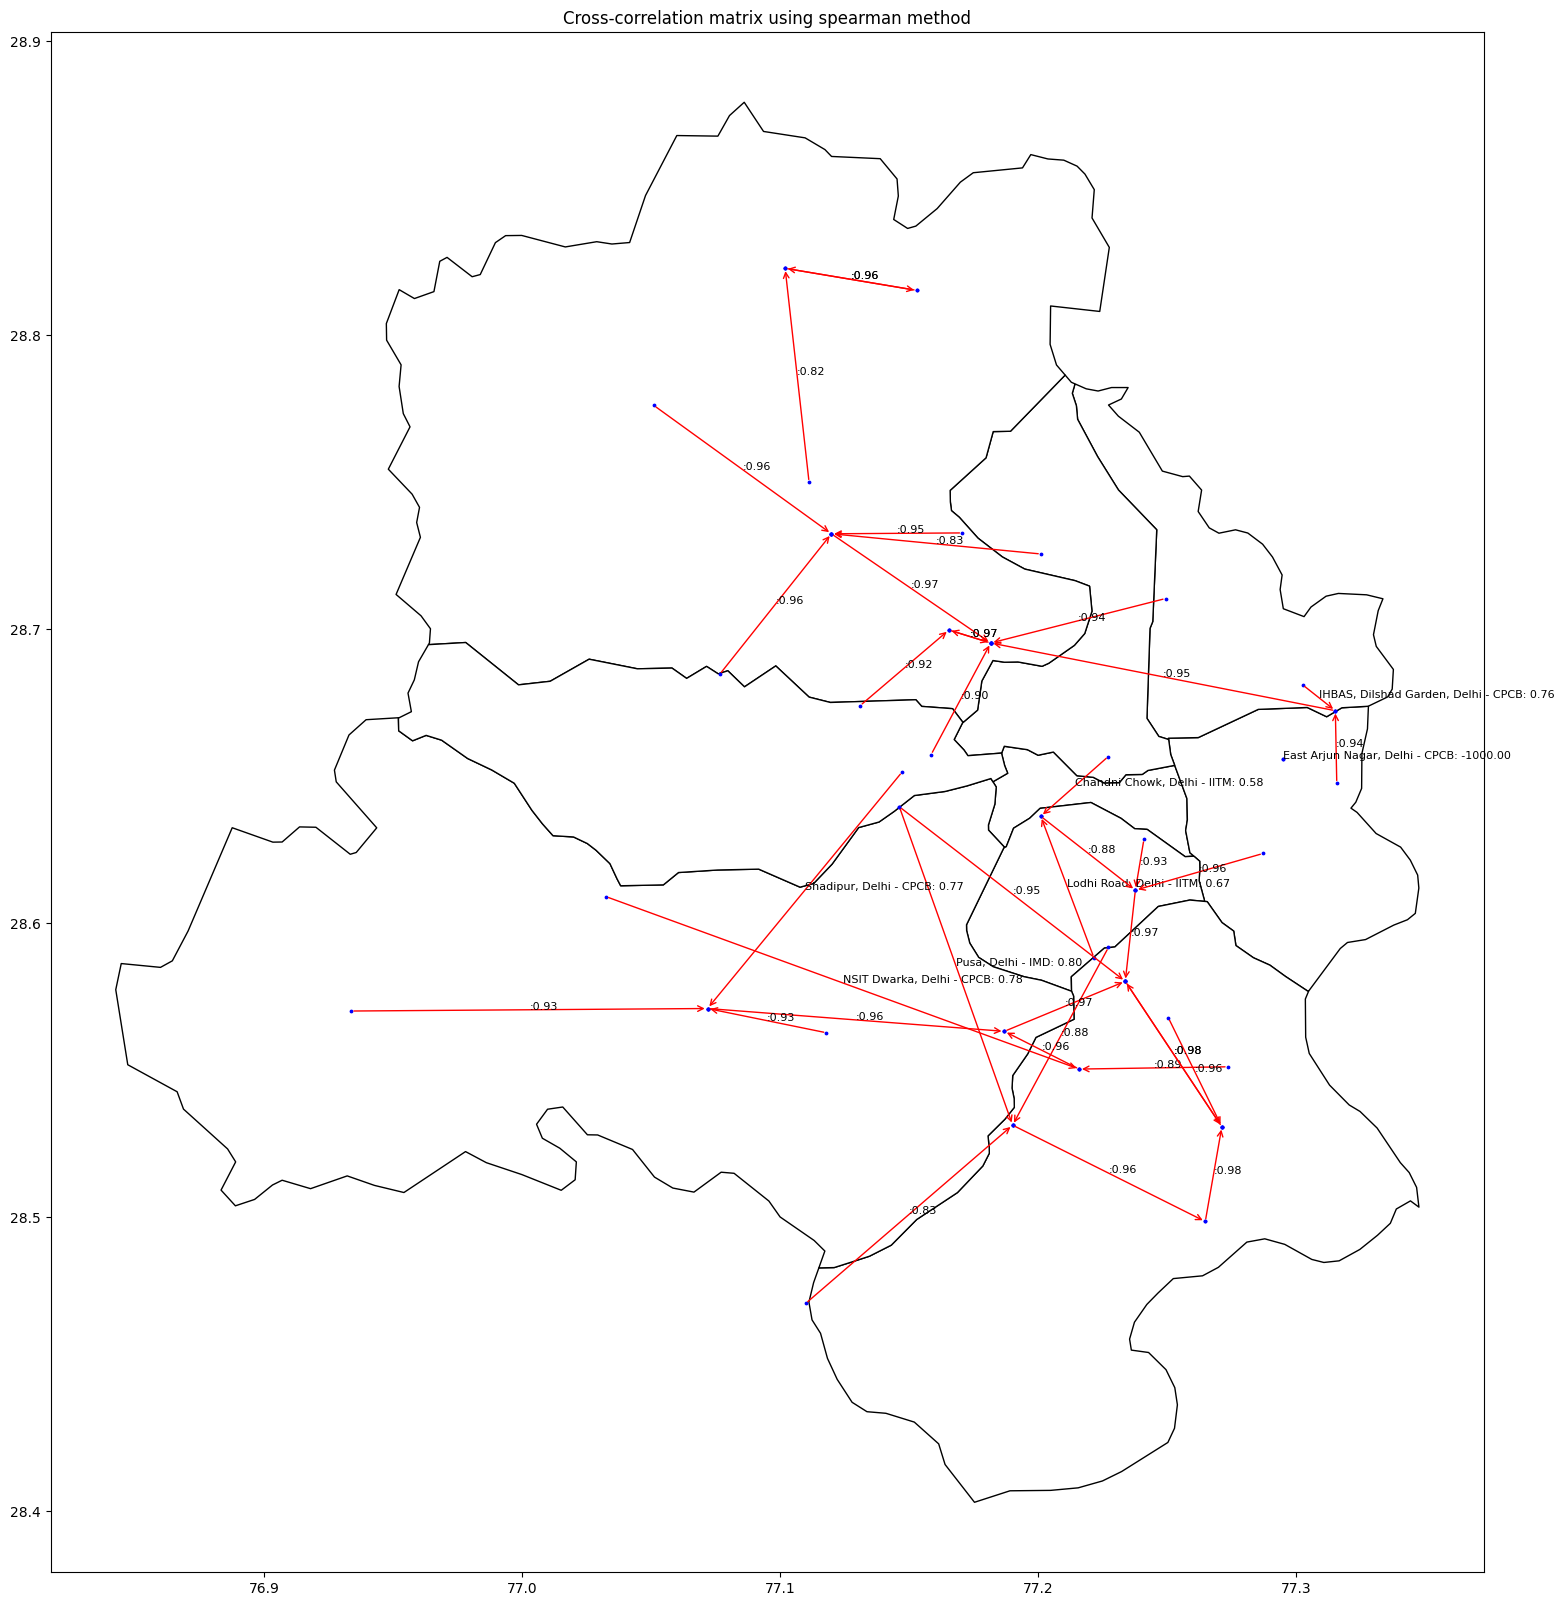

In [142]:
# ds = ds.sel(time="2022-01")
# t = ds["PM2.5"].mean(dim="time")
df = ds["PM2.5"].mean(dim="time").to_dataframe().reset_index().sort_values("PM2.5", ascending=False)
# plt.scatter(t.longitude, t.latitude, c=t.values, cmap="coolwarm")
# plt.colorbar()
# fig, ax = plt.subplots(figsize=(20, 5))
# stations = ["Jahangirpuri, Delhi - DPCC", "Burari Crossing, Delhi - IMD", "Punjabi Bagh, Delhi - DPCC", "Anand Vihar, Delhi - DPCC"]
# for station in stations:
#     (lambda x: ds["PM2.5"].sel(station=x).plot(ax=ax, label=x))(station)

# ax.legend()
# plt.show()
# create cross-correlation matrix

for method in ["pearson", "spearman"]:
    fig, ax = plt.subplots(figsize=(20, 20))
    gdf = gpd.read_file("/home/patel_zeel/aqmsp/aqmsp_data/datasets/shapefiles/delhi/Districts.shp")
    gdf.plot(ax=ax, color="white", edgecolor="black")
    corr_station_df = pd.DataFrame(index=ds.station, columns=ds.station)
    for i in range(len(ds.station)):
        current_station = ds.station[i].item()
        max_corr = -2000
        for j in range(len(ds.station)):
            if i == j:
                corr_station_df.iloc[i, j] = -1000
            else:
                corr_station_df.iloc[i, j] = ds["PM2.5"].sel(station=ds.station[i]).to_series().corr(ds["PM2.5"].sel(station=ds.station[j]).to_series(), method=method)
            if corr_station_df.iloc[i, j] > max_corr:
                max_corr = corr_station_df.iloc[i, j]
                max_corr_station = ds.station[j]
                
        lat, lon = ds.sel(station=current_station).latitude.values.item(), ds.sel(station=current_station).longitude.values.item()
        max_lat, max_lon = ds.sel(station=max_corr_station).latitude.values.item(), ds.sel(station=max_corr_station).longitude.values.item()
        # draw arrow from current station to max_corr_station
        # print(lat, lon, max_lat, max_lon, max_corr_station.item(), max_corr, current_station)
        ax.scatter(lon, lat, c="blue", s=3)
        ax.scatter(max_lon, max_lat, c="blue", s=3)
        ax.annotate("", xy=(max_lon, max_lat), xytext=(lon, lat), arrowprops=dict(arrowstyle="->", color="red"))
        # place corr value on the arrow
        if max_corr > 0.8:
            string = f":{max_corr:.2f}"
        else:
            string = f"{current_station}: {max_corr:.2f}"
        ax.text((lon + max_lon) / 2, (lat + max_lat) / 2, string, fontsize=8)
    plt.title(f"Cross-correlation matrix using {method} method")
    plt.show()

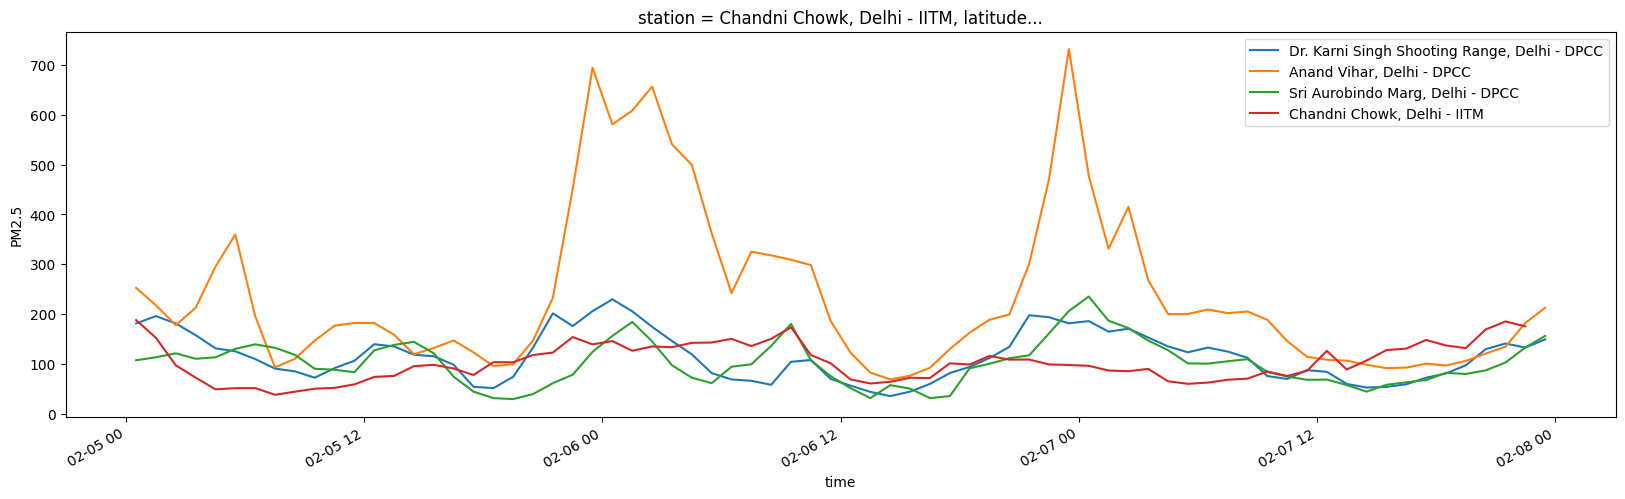

In [147]:
tslice = slice("2022-02-05", "2022-02-7")
fig, ax = plt.subplots(figsize=(20, 5))
(lambda x: ds["PM2.5"].sel(station=x, time=tslice).plot(label=x, ax=ax))("Dr. Karni Singh Shooting Range, Delhi - DPCC")
(lambda x: ds["PM2.5"].sel(station=x, time=tslice).plot(label=x, ax=ax))("Anand Vihar, Delhi - DPCC")
(lambda x: ds["PM2.5"].sel(station=x, time=tslice).plot(label=x, ax=ax))("Sri Aurobindo Marg, Delhi - DPCC")
(lambda x: ds["PM2.5"].sel(station=x, time=tslice).plot(label=x, ax=ax))("Chandni Chowk, Delhi - IITM")

ax.legend()

In [149]:
xr.open_dataset("~/sarath_auto_download/data/camxmet3d.delhi.20230929.96hours.nc")

<xarray.Dataset>
Dimensions:    (TSTEP: 96, VAR: 6, DATE-TIME: 2, LAY: 20, ROW: 80, COL: 80)
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY, ROW, COL
Data variables:
    TFLAG      (TSTEP, VAR, DATE-TIME) int32 ...
    ZGRID_M    (TSTEP, LAY, ROW, COL) float32 ...
    PRESS_MB   (TSTEP, LAY, ROW, COL) float32 ...
    TEMP_K     (TSTEP, LAY, ROW, COL) float32 ...
    HUMID_PPM  (TSTEP, LAY, ROW, COL) float32 ...
    UWIND_MpS  (TSTEP, LAY, ROW, COL) float32 ...
    VWIND_MpS  (TSTEP, LAY, ROW, COL) float32 ...
Attributes: (12/33)
    IOAPI_VERSION:  $Id: @(#) ioapi library version 3.0 $                    ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2023272
    CTIME:          72208
    WDATE:          2023272
    ...             ...
    VGLVLS:         [1.   0.99 0.98 0.96 0.94 0.92 0.9  0.88 0.86 0.84 0.82 0...
    GDNAM:          ????????????????
    UPNAM:          CAMx2IOAPI      
    VAR-LIST:       ZGRID_M         PRESS_MB        TEMP_K          HUMID_PPM...
    FILEDESC:       I/O API formatted CAMx AVRG output                       ...
    HISTORY: